In [3]:
# Import the fucking useful libraries =)
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import helpers

%matplotlib inline
%load_ext autoreload
%autoreload 2

# There's a lot of columns in the DF. 
# Therefore, we add this option so that we can see more columns
pd.options.display.max_columns = 100

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Search for spammer

It is very likely that the data contains some "spammers" who always rate the movies with a good or a bad grade. In this notebook we will try to find if it is the case and remove them

In [4]:
df = pd.read_csv('../data/data_train.csv')
df = helpers.extract_from_original_table(df)
df.head()

,UserID,MovieID,Rating
0,44,1,4
1,61,1,3
2,67,1,4
3,72,1,3
4,86,1,5


In [5]:
print("Rating min: ", df['Rating'].min())
print("Rating max: ", df['Rating'].max())
print("The movies are rated between", df['Rating'].min()," and ", df['Rating'].max())


print("UserID min: ", df['UserID'].min())
print("UserID max: ", df['UserID'].max())
print("The UserID are between", df['UserID'].min()," and ", df['UserID'].max())

Rating min:  1
Rating max:  5
The movies are rated between 1  and  5
UserID min:  1
UserID max:  10000
The UserID are between 1  and  10000


## Variances of rating

In [6]:
variances = []
for i in range(1, df['UserID'].max()+1):
    var = df.loc[df['UserID'] == i]['Rating'].var()
    variances.append(var)

<function matplotlib.pyplot.show>

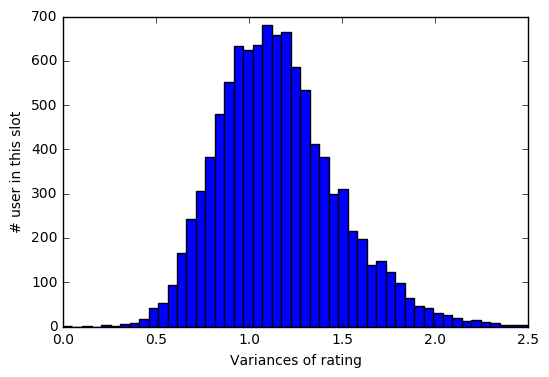

In [7]:
plt.hist(variances, bins=np.linspace(0, 2.5, 50))
plt.xlabel('Variances of rating')
plt.ylabel('# user in this slot')
plt.show

## Number of rating

User rates between 3 and 522 movies
count    10000.000000
mean       117.695200
std         67.900609
min          3.000000
25%         68.000000
50%        104.000000
75%        153.000000
max        522.000000
Name: Rating, dtype: float64


<function matplotlib.pyplot.show>

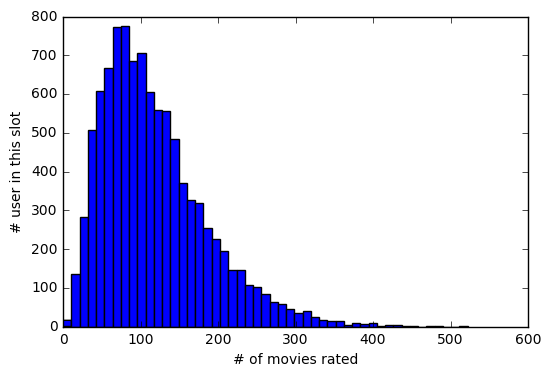

In [8]:
ratings = df.groupby('UserID')['Rating'].count()

print("User rates between", ratings.min(), "and", ratings.max(), "movies")

print(ratings.describe())

plt.hist(ratings,  bins=np.linspace(0, ratings.max(), 50))
plt.xlabel('# of movies rated')
plt.ylabel('# user in this slot')
plt.show

In [9]:
ratings.loc[ratings < 100].count()

4710

## Deviation of users mean

overall general mean of ratings by user 3.8321255854690937


<function matplotlib.pyplot.show>

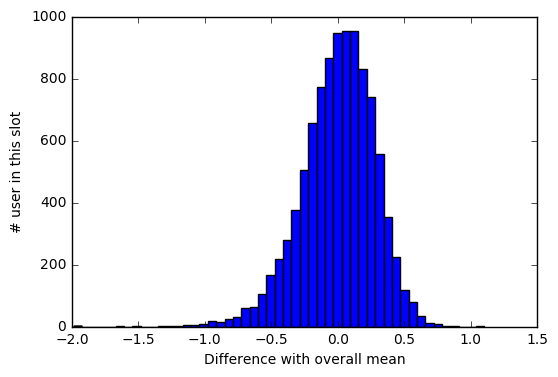

In [10]:
users_mean = df.groupby('UserID')['Rating'].mean()
general_mean = users_mean.mean()
print('overall general mean of ratings by user', general_mean)
deviations = users_mean - general_mean
plt.hist(deviations, bins=np.linspace(deviations.min(), deviations.max(), 50) )
plt.xlabel('Difference with overall mean')
plt.ylabel('# user in this slot')
plt.show

In [11]:
# deviations.to_csv('../data/deviations_per_users.csv')

In [12]:
deviations[3]

-0.30886977151560524

In [13]:
def rescale(row):
    return row['Rating'] - deviations[row['UserID']]

df2 = pd.DataFrame.copy(df).reset_index()
df2['Rating_mood'] = df2.apply(rescale, axis=1)
df2.head()

,index,UserID,MovieID,Rating,Rating_mood
0,0,44,1,4,3.938425
1,1,61,1,3,2.598430
2,2,67,1,4,4.251480
3,3,72,1,3,2.970702
4,4,86,1,5,4.728805


overall general mean of ratings by user 3.832125585468614


<function matplotlib.pyplot.show>

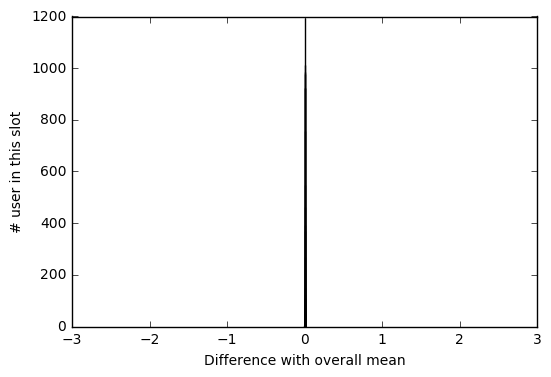

In [14]:
users_mean = df2.groupby('UserID')['Rating_mood'].mean()
general_mean = users_mean.mean()
print('overall general mean of ratings by user', general_mean)
deviations = users_mean - general_mean
plt.hist(deviations, bins=np.linspace(deviations.min(), deviations.max(), 50) )
plt.xlabel('Difference with overall mean')
plt.ylabel('# user in this slot')
plt.xlim(-3 ,3)
plt.show

In [15]:
import helpers
df3 = helpers.recover_original_table(df2, 'UserID', 'MovieID', 'Rating_mood')
df3.head()

,Id,Prediction
0,r44_c1,3.938425
1,r61_c1,2.598430
2,r67_c1,4.251480
3,r72_c1,2.970702
4,r86_c1,4.728805


In [16]:
# df3.to_csv('../data/data_rescaled.csv', index=False)

## Rates distributions

In [19]:
df['Rating']

0          4
1          3
2          4
3          3
4          5
5          4
6          3
7          3
8          2
9          5
10         4
11         3
12         3
13         3
14         1
15         3
16         2
17         4
18         4
19         2
20         3
21         2
22         4
23         3
24         3
25         3
26         2
27         3
28         4
29         1
          ..
1176922    3
1176923    4
1176924    3
1176925    5
1176926    3
1176927    2
1176928    5
1176929    5
1176930    4
1176931    2
1176932    3
1176933    3
1176934    4
1176935    2
1176936    4
1176937    5
1176938    4
1176939    3
1176940    4
1176941    3
1176942    4
1176943    3
1176944    5
1176945    5
1176946    5
1176947    4
1176948    5
1176949    3
1176950    4
1176951    3
Name: Rating, dtype: int64

<function matplotlib.pyplot.show>

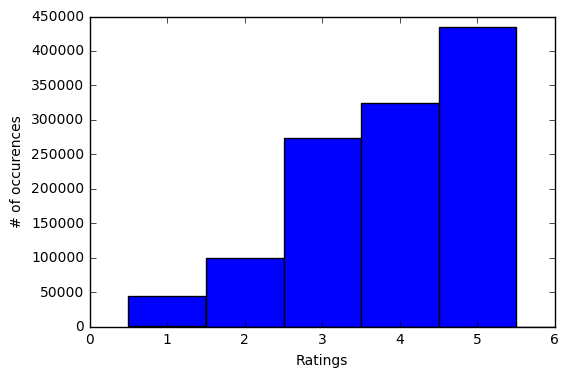

In [36]:
plt.hist(df['Rating'], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6])
plt.xlabel('Ratings')
plt.ylabel('# of occurences')
plt.show